In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# this is data produced by creating 250m buffer around train and subway stations
# and then  intesecting it with datazones 

gdf = gpd.read_file(r'd:\viz\trainlines\derived\New folder\derived_data.gpkg', layer='dz_buf')

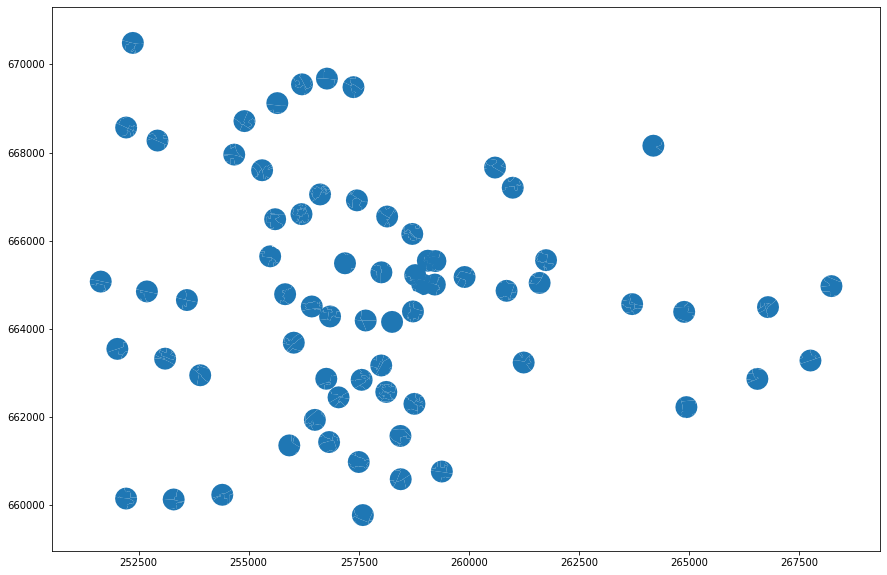

In [33]:
gdf.plot()

In [4]:
gdf.columns

Index(['osm_id', 'code', 'fclass', 'name', 'DataZone', 'Name_2', 'geometry'], dtype='object')

In [189]:
gdf.head()

,osm_id,code,fclass,name,DataZone,Name_2,geometry
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451...."
1,22256341,5601.0,railway_station,Cardonald,S01009834,Drumoyne and Shieldhall - 02,"MULTIPOLYGON (((253848.069 664653.007, 253839...."
2,22256341,5601.0,railway_station,Cardonald,S01009836,Drumoyne and Shieldhall - 04,"MULTIPOLYGON (((253357.205 664710.688, 253360...."
3,22256341,5601.0,railway_station,Cardonald,S01009851,Craigton - 04,"MULTIPOLYGON (((253839.836 664601.027, 253835...."
4,26766905,5601.0,subway,Kelvinhall,S01010380,Kelvingrove and University - 07,"MULTIPOLYGON (((256097.430 666828.575, 256121...."


In [34]:
print (type(gdf))
print (gdf.crs)
print (gdf.geom_type)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:27700'}
0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
366    MultiPolygon
367    MultiPolygon
368    MultiPolygon
369    MultiPolygon
370    MultiPolygon
Length: 371, dtype: object


In [5]:
#changing gdf to df 
df = pd.DataFrame(gdf[[col for col in gdf.columns if col != gdf._geometry_column_name]])

In [6]:
df.head()
#print(type(df))

,osm_id,code,fclass,name,DataZone,Name_2
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01
1,22256341,5601.0,railway_station,Cardonald,S01009834,Drumoyne and Shieldhall - 02
2,22256341,5601.0,railway_station,Cardonald,S01009836,Drumoyne and Shieldhall - 04
3,22256341,5601.0,railway_station,Cardonald,S01009851,Craigton - 04
4,26766905,5601.0,subway,Kelvinhall,S01010380,Kelvingrove and University - 07


In [8]:
#selecting only stations and datazones around them

df1 = pd.pivot_table(df, index = ['name','DataZone'])

In [10]:
df2 = df1.reset_index().drop('code',1)
df2

,name,DataZone
0,Alexandra Parade,S01010234
1,Alexandra Parade,S01010238
2,Alexandra Parade,S01010239
3,Alexandra Parade,S01010240
4,Alexandra Parade,S01010241
...,...,...
365,Summerston,S01010346
366,Summerston,S01010349
367,Summerston,S01010352
368,Summerston,S01010353


*now there are station's names and datazones which could be joined with ROS price info per datazone*

In [14]:
#loading Glasgow properties with cleaned price 

glasgow_prop_price = pd.read_csv(r'd:\viz\trainlines\derived\code\glasgow_properties_deep_cleaned.csv',
                                 parse_dates=['application_date'])

In [15]:
glasgow_prop_price.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008


In [18]:
gpp_gdf =  gpd.GeoDataFrame(glasgow_prop_price,
     geometry=gpd.points_from_xy(glasgow_prop_price.easting, glasgow_prop_price.northing))

In [188]:
gpp_gdf.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660)
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600)
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100)
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500)
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700)


In [35]:
type(gpp_gdf)

geopandas.geodataframe.GeoDataFrame

In [19]:
gpp_gdf.crs = {'init' :'epsg:27700'}

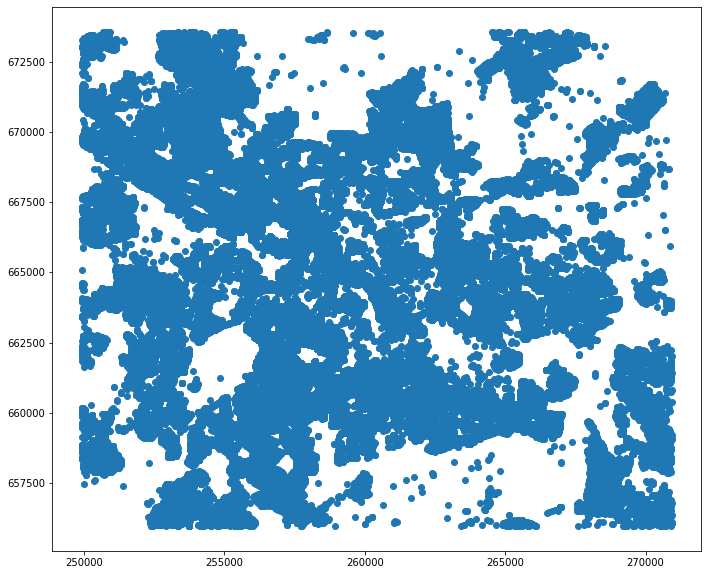

In [22]:
gpp_gdf.plot()

In [203]:
gpp_gdf.head()

,Unnamed: 0,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry
0,4,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660)
1,6,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600)
2,8,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100)
3,10,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500)
4,12,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700)


In [190]:
#load datazone file
dz=gpd.read_file(r'D:\Data\SpatialDataGov\SG_DataZoneBdry_2011\SG_DataZone_Bdry_2011.shp')

In [206]:
#spatial join 

join = gpd.sjoin(gpp_gdf, dz, how="left", op="within")

In [207]:
join= join.iloc[:, 1:12]

In [208]:
join.head()

,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry,index_right,DataZone
0,2008-03-01,NaN,GLA42635,NaN,252919.72,663924.66,93500.0,2008,POINT (252919.720 663924.660),3313.0,S01009819
1,2008-03-01,NaN,GLA198103,NaN,259692.80,659621.60,84000.0,2008,POINT (259692.800 659621.600),3483.0,S01009989
2,2008-03-01,NaN,GLA31308,NaN,252564.50,659359.10,81000.0,2008,POINT (252564.500 659359.100),3260.0,S01009766
3,2008-03-01,NaN,GLA86041,NaN,264653.90,668245.50,85950.0,2008,POINT (264653.900 668245.500),3681.0,S01010187
4,2008-03-01,NaN,GLA198123,NaN,260881.79,667063.70,124950.0,2008,POINT (260881.790 667063.700),3719.0,S01010225


In [209]:
#use merge  so all price points from datazone are included

join_dz = pd.merge(gdf, join,on='DataZone' )

In [210]:
join_dz.head()

,osm_id,code,fclass,name,DataZone,Name_2,geometry_x,application_date,flag,title_number,date_of_entry,easting,northing,consideration_1,year,geometry_y,index_right
0,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451....",2008-06-02,NaN,GLA213,NaN,253297.41,664685.79,70000.0,2008,POINT (253297.410 664685.790),3304.0
1,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451....",2008-04-28,NaN,GLA215,NaN,253343.35,664650.03,75000.0,2008,POINT (253343.350 664650.030),3304.0
2,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451....",2008-01-05,NaN,GLA61163,NaN,253373.40,664518.30,138050.0,2008,POINT (253373.400 664518.300),3304.0
3,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451....",2008-06-17,NaN,GLA30414,NaN,253361.50,664291.60,88117.0,2008,POINT (253361.500 664291.600),3304.0
4,22256341,5601.0,railway_station,Cardonald,S01009810,Cardonald North - 01,"MULTIPOLYGON (((253472.552 664439.834, 253451....",2008-06-24,NaN,GLA200558,NaN,253476.40,664398.60,110000.0,2008,POINT (253476.400 664398.600),3304.0


In [246]:
join_dz.rename(columns = {'geometry':'geometry_1', 'geometry_y':'geometry'},inplace = True)

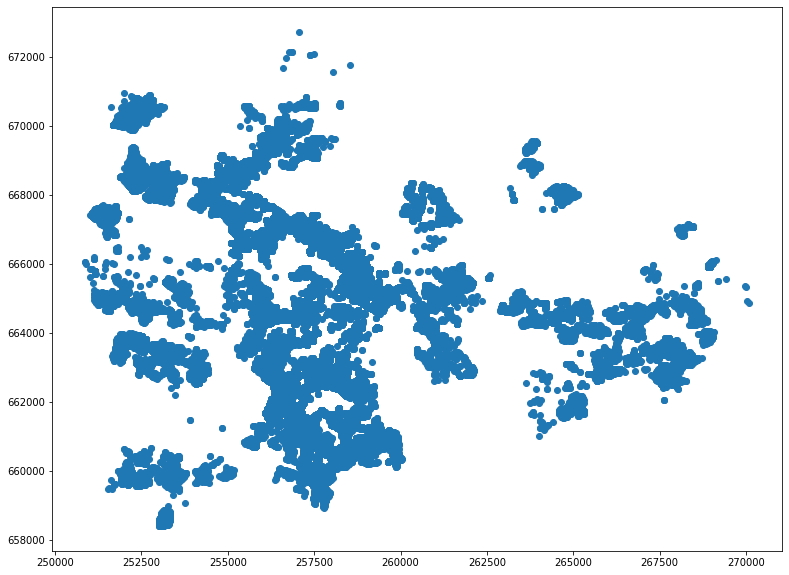

In [247]:
join_dz.plot()

In [218]:
len(join_dz)

79190

In [257]:
#QA - all good
join_dz.query('(DataZone == "S01010188" or DataZone == "S01010187") and year ==2017')['consideration_1'].mean()

219617.9898989899

In [258]:
#QA
#fig, ax = plt.subplots()

#join_dz.query('(DataZone == "S01010188" or DataZone == "S01010187") and year ==2017').plot(ax=ax)
#dz.query('(DataZone == "S01010188" or DataZone == "S01010187")').plot(ax=ax, alpha = 0.2)
##['consideration_1'].mean()

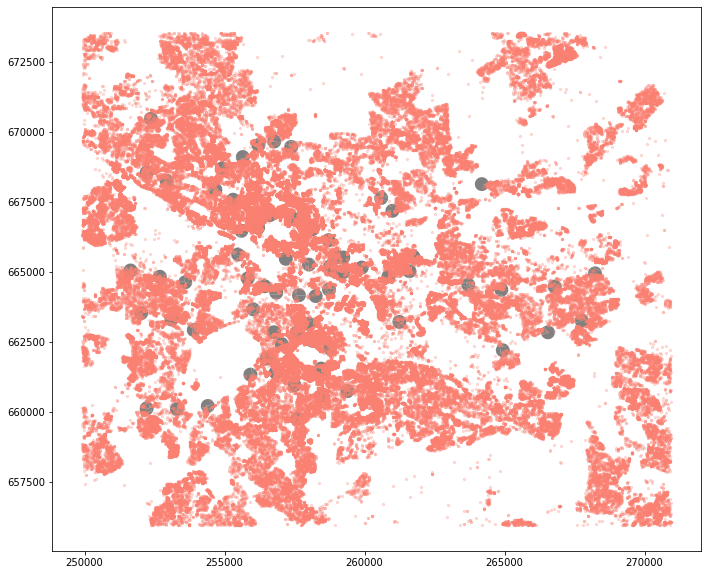

In [46]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
gdf.plot(ax=ax, facecolor='gray')

# Plot points
gpp_gdf.plot(ax=ax, color='salmon', markersize=5, alpha =0.25)


In [219]:
#subselecting non-empty DataZones

dz_price = join_dz[join_dz['DataZone'].notnull()]

In [221]:
#qa =dz_price.query('name == "Dalmarnock" |year==2018')
#print(qa['year'].mean())

In [222]:
#grouping by name with descriptive stats
export = dz_price.groupby('name')['consideration_1'].describe()

In [223]:
export

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Alexandra Parade,1272.0,92860.890487,60473.925604,20400.0,64937.50,86500.0,110000.00,860451.0
Anderston,1870.0,192171.267481,161896.063753,20400.0,110000.00,149995.0,201250.00,1000000.0
Anniesland,1145.0,203313.467537,127778.062980,20010.0,113500.00,170000.0,271500.00,905000.0
Argyle Street,2596.0,192382.530189,164125.628962,20500.0,99000.00,150000.0,215287.50,1000000.0
Baillieston,1272.0,186757.211643,88047.567495,20100.0,112500.00,195995.0,244996.25,750000.0
...,...,...,...,...,...,...,...,...
Springburn,587.0,87599.155111,137025.402376,20160.0,48000.00,65000.0,80000.00,912000.0
St Enoch,2635.0,195520.702467,165079.954312,21000.0,107900.00,150000.0,210000.00,1000000.0
St Georges Cross,1254.0,153351.152081,86757.653154,20700.0,105324.25,142000.0,181000.00,843982.0


In [116]:
export.to_csv(r'd:\viz\trainlines\derived\station_price.csv')

In [224]:
#another way is to keep YEAR data for time series viz
export_year = dz_price.groupby(['name', 'year'])['consideration_1'].describe()


In [225]:
export_year1 = export_year.reset_index()
export_year1.head()

,name,year,count,mean,std,min,25%,50%,75%,max
0,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0
1,Alexandra Parade,2009,109.0,94856.528440,63274.117807,21750.0,70000.0,93000.0,109000.0,665000.0
2,Alexandra Parade,2010,111.0,89563.702703,47428.189874,21900.0,67500.0,87500.0,109000.0,329000.0
3,Alexandra Parade,2011,100.0,90171.059600,41852.597025,21600.0,63000.0,87750.0,110000.0,275000.0
4,Alexandra Parade,2012,90.0,82260.088889,48036.222062,25000.0,54625.0,72000.0,95000.0,306000.0


In [226]:
export_year1.query('name == "Dalmarnock"')

,name,year,count,mean,std,min,25%,50%,75%,max
209,Dalmarnock,2008,65.0,109956.723077,117133.326684,20550.0,57000.0,75000.0,106000.00,600000.0
210,Dalmarnock,2009,56.0,118577.410714,104452.140067,21000.0,57000.0,92500.0,125750.00,525000.0
211,Dalmarnock,2010,38.0,181857.631579,204416.564773,22000.0,49250.0,105000.0,175000.00,763760.0
212,Dalmarnock,2011,50.0,181569.000000,157463.223076,31000.0,61375.0,150000.0,331250.00,846000.0
213,Dalmarnock,2012,37.0,374088.594595,352071.673484,25000.0,55000.0,150000.0,814000.00,814000.0
214,Dalmarnock,2013,39.0,95853.774359,111060.752925,22000.0,40000.0,56000.0,98500.00,505100.0
215,Dalmarnock,2014,33.0,117407.575758,163157.551408,23000.0,38000.0,54000.0,85000.00,800000.0
216,Dalmarnock,2015,261.0,131883.807893,55832.456722,29000.0,108000.0,130000.0,165000.00,791256.0
217,Dalmarnock,2016,78.0,112570.153846,75332.929874,23000.0,57750.0,91525.0,153000.00,412800.0
218,Dalmarnock,2017,49.0,128436.081633,183674.433968,30000.0,55000.0,75000.0,105000.00,910000.0


In [227]:
#adding coord to export_year

export_year_xy = pd.merge(export_year1,gdf, on ='name' )
export_year_xy.head()

,name,year,count,mean,std,min,25%,50%,75%,max,osm_id,code,fclass,DataZone,Name_2,geometry
0,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,3727609000,5601.0,railway_station,S01010234,Dennistoun North - 01,"MULTIPOLYGON (((261502.025 665569.771, 261506...."
1,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,3727609000,5601.0,railway_station,S01010238,Dennistoun North - 05,"MULTIPOLYGON (((261706.311 665314.888, 261672...."
2,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,3727609000,5601.0,railway_station,S01010239,Alexandra Parade - 01,"MULTIPOLYGON (((261508.598 665611.270, 261512...."
3,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,3727609000,5601.0,railway_station,S01010240,Alexandra Parade - 02,"MULTIPOLYGON (((261786.235 665684.179, 261767...."
4,Alexandra Parade,2008,165.0,104771.740242,88466.441126,25500.0,70000.0,95000.0,115000.0,860451.0,3727609000,5601.0,railway_station,S01010241,Alexandra Parade - 03,"MULTIPOLYGON (((262000.152 665557.944, 261987...."


In [228]:
export_year_xy_gdf = gpd.GeoDataFrame(export_year_xy,geometry = 'geometry' )


In [229]:
export_year_xy_gdf.to_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz', driver="GPKG")

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'


In [230]:
export_year_xy_gdf= export_year_xy_gdf[['name','year','mean','fclass','geometry']]

In [231]:
export_year_xy_gdf

,name,year,mean,fclass,geometry
0,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261502.025 665569.771, 261506...."
1,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261706.311 665314.888, 261672...."
2,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261508.598 665611.270, 261512...."
3,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((261786.235 665684.179, 261767...."
4,Alexandra Parade,2008,104771.740242,railway_station,"MULTIPOLYGON (((262000.152 665557.944, 261987...."
...,...,...,...,...,...
4076,West Street,2014,240417.181818,subway,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4077,West Street,2015,215569.692308,subway,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4078,West Street,2016,134262.206897,subway,"MULTIPOLYGON (((258504.965 664156.182, 258492...."
4079,West Street,2017,211408.433333,subway,"MULTIPOLYGON (((258504.965 664156.182, 258492...."


In [232]:
export_year_xy_gdf_dissolved = export_year_xy_gdf.dissolve(by=['name','year'])

In [233]:
len(export_year_xy_gdf_dissolved)

759

In [234]:
export_year_xy_gdf_dissolved.query('name == "Dalmarnock"')

geometry  \
name       year                                                      
Dalmarnock 2008  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2009  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2010  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2011  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2012  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2013  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2014  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2015  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2016  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2017  POLYGON ((261416.903 663059.556, 261389.464 66...   
           2018  POLYGON ((261416.903 663059.556, 261389.464 66...   

                          mean           fclass  
name       year                                  
Dalmarnock 2008  109956.723077  railway_station  
           2009  118577.410714  railway_station  
           2010  181857.631579  railway_station  
           2011  181569.000000  railway_station  
           2012  374088.594595  railway_station  
           2013   95853.774359  railway_station  
           2014  117407.575758  railway_station  
           2015  131883.807893  railway_station  
           2016  112570.153846  railway_station  
           2017  128436.081633  railway_station  
           2018  240319.875000  railway_station

In [235]:
df_export = export_year_xy_gdf_dissolved.reset_index()
print (df_export.head())
print (len(df_export))


               name  year                                           geometry  \
0  Alexandra Parade  2008  POLYGON ((261781.066 665312.841, 261750.152 66...   
1  Alexandra Parade  2009  POLYGON ((261781.066 665312.841, 261750.152 66...   
2  Alexandra Parade  2010  POLYGON ((261781.066 665312.841, 261750.152 66...   
3  Alexandra Parade  2011  POLYGON ((261781.066 665312.841, 261750.152 66...   
4  Alexandra Parade  2012  POLYGON ((261781.066 665312.841, 261750.152 66...   

            mean           fclass  
0  104771.740242  railway_station  
1   94856.528440  railway_station  
2   89563.702703  railway_station  
3   90171.059600  railway_station  
4   82260.088889  railway_station  
759


In [236]:
# createing additional column to add datetime for display in QGIS time manager
# DD-MM-YYYY

df_export['time_man'] = '01-01-'+df_export['year'].astype(str)

In [237]:
df_export['mean']=df_export['mean'].round(2).astype(str)

In [238]:
df_export.to_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz_dissolved', driver="GPKG")

CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_dissolved_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'sqlite3_exec(CREATE VIRTUAL TABLE "rtree_price_dz_dissolved_geom" USING rtree(id, minx, maxx, miny, maxy)) failed: no such module: rtree'
